In [181]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
stop_words = set(stopwords.words('english'))
import numpy as np



In [2]:
data = pd.read_csv('D://MSBA//Third Sem//NLP//group Project//archive (6)//spam_ham_dataset.csv')

In [3]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [5]:
data = data.drop(columns = ["label", "label_num", "Unnamed: 0"], axis = 1)

In [6]:

data = data.text.values

In [7]:
data[7]
    

'Subject: looking for medication ? we ` re the best source .\r\nit is difficult to make our material condition better by the best law , but it is easy enough to ruin it by bad laws .\r\nexcuse me . . . : ) you just found the\r\nbest and simpliest site for\r\nmedication on the net . no perscription , easy\r\ndelivery .\r\nprivate , secure , and easy .\r\nbetter see rightly on a pound a week than squint on a million .\r\nwe ` ve got\r\nanything that you will ever want .\r\nerection treatment pills , anti - depressant pills , weight loss , and\r\nmore ! http : / / splicings . bombahakcx . com / 3 /\r\nknowledge and human power are synonymous .\r\nonly high - quality stuff for low rates !\r\n100 % moneyback guarantee !\r\nthere is no god , nature sufficeth unto herself in no wise hath she need of an author .'

### Data Pre-Processing 

In [182]:
def preprocessing (text):
    wnl = nltk.stem.WordNetLemmatizer()
    text = text.lower()
    text = re.sub("(http|https|www)(:|\.)\S+.com"," ",text)
    text = re.sub('[^a-zA-Z0-9\n]', ' ', text)
    text = re.sub("[^\w\d]"," ",text)
    text = re.sub("\d+"," ",text)
    text = re.sub('\s+',' ', text)
    text = " ".join([wnl.lemmatize(word) for word in text.split() if word not in nltk.corpus.stopwords.words("english")])
    return text


<>:4: DeprecationWarning: invalid escape sequence \.
<>:6: DeprecationWarning: invalid escape sequence \w
<>:7: DeprecationWarning: invalid escape sequence \d
<>:8: DeprecationWarning: invalid escape sequence \s
<>:4: DeprecationWarning: invalid escape sequence \.
<>:6: DeprecationWarning: invalid escape sequence \w
<>:7: DeprecationWarning: invalid escape sequence \d
<>:8: DeprecationWarning: invalid escape sequence \s
C:\Users\deyoz\AppData\Local\Temp\ipykernel_33712\2622380155.py:4: DeprecationWarning: invalid escape sequence \.
  text = re.sub("(http|https|www)(:|\.)\S+.com"," ",text)
C:\Users\deyoz\AppData\Local\Temp\ipykernel_33712\2622380155.py:6: DeprecationWarning: invalid escape sequence \w
  text = re.sub("[^\w\d]"," ",text)
C:\Users\deyoz\AppData\Local\Temp\ipykernel_33712\2622380155.py:7: DeprecationWarning: invalid escape sequence \d
  text = re.sub("\d+"," ",text)
C:\Users\deyoz\AppData\Local\Temp\ipykernel_33712\2622380155.py:8: DeprecationWarning: invalid escape sequen

In [9]:
preprocessing(data[0])

'subject enron methanol meter follow note gave monday preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed asap economics purpose'

In [10]:
processed_email = []
for email in data:
    processed_email.append(preprocessing(email))

In [11]:
#processed_email[:100]

### Data Exploration

In this section, we will build the word cloud to visualize most common words in the corpus, so that we can get some insight, whether such common words are really important.

### Creating Wordcloud

In [12]:
#pip install wordcloud

In [13]:
import wordcloud
from wordcloud import WordCloud

In [14]:
wordcloud = WordCloud(background_color = "white", max_words=1000, contour_width = 5, contour_color ='steelblack')

In [15]:
all_email_text = ",".join(processed_email)

In [16]:
wordcloud.generate(all_email_text)

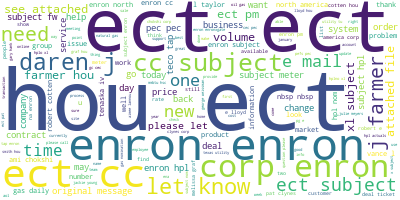

In [17]:
wordcloud.to_image()

from this initial wordcloud, we can see that most common words are infact nonstandard english words and also common words like subject, email, attach etc. are less important in this analysis. 

In [ ]:
#### we remove the 200 most common words, the words that are less than or equal to three characters and the words such as people names, months etc.

In [18]:
words = []
for i in processed_email:
    for word in nltk.word_tokenize(i):
        words.append(word)

In [213]:
fd = nltk.FreqDist(word for word in words )
common_words = [w for (w,c) in fd.most_common(150)]
short_words = [w for(w,c) in fd.most_common() if len(w) <= 3]


In [214]:
namelist = [name.lower() for name in nltk.corpus.names.words()]


In [138]:
day_month = ['sunday', 'monday','tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

In [215]:
stopwords_extra = common_words+short_words+namelist+day_month
#stopwords_extra

In [216]:
def preprocessing_2 (text):
    text = " ".join([t for t in text.split() if t not in stopwords_extra]) 
    return text        

In [217]:
preprocessing_2(processed_email[100])

'talk getting labor distribution employee hitting discussed prior soem manager receiving monthly thank'

In [218]:
processed_email_1 = []
for email in processed_email:
    processed_email_1.append(preprocessing_2(email))

In [219]:
all_email_text_1 = ",".join(processed_email_1)

In [220]:
wordcloud.generate(all_email_text_1)

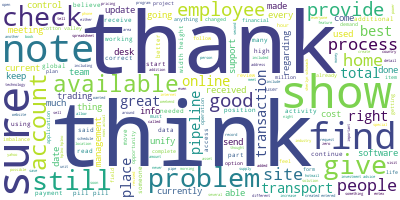

In [221]:
wordcloud.to_image()

#### Frequency distribution of 100 most common words

In [223]:
words_1 = []
for email in processed_email_1:
    for word in nltk.word_tokenize(email):
        words_1.append(word)

In [224]:
#fd_1 = nltk.FreqDist([w for w in words_1]).most_common(200)

As it can be observed that the corpus now is much improved, though there are still words that do not add value in our analysis. We will find out later where those words required further processing.

## Topic Modeling using Latent Dirichlet Allocation

In [225]:
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

In [226]:
def sent_to_words(sentences):
    for sentences in sentences:
        yield(gensim.utils.simple_preprocess(str(sentences)))

In [227]:
data = processed_email_1

In [229]:
data_words = list(sent_to_words(data))

In [33]:
#print(data_words)

##### Create Dictionary 

In [230]:
corpus_dict = corpora.Dictionary (data_words)


##### Create Corpus

In [231]:
texts = data_words

##### Create Term Document Frequency 

In [232]:
corpus = [corpus_dict.doc2bow(text) for text in texts] 

In [233]:
print(corpus[:1][0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


### LDA Model Training 

In [234]:
from pprint import pprint


In [245]:
lda_model = gensim.models.LdaMulticore(corpus = corpus, 
                                      id2word = corpus_dict, num_topics = 7)

In [246]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.003*"pill" + 0.003*"computron" + 0.002*"transport" + 0.002*"show" + '
  '0.002*"special" + 0.002*"visit" + 0.002*"link" + 0.002*"chokshi" + '
  '0.002*"online" + 0.002*"hplno"'),
 (1,
  '0.003*"chokshi" + 0.003*"hplno" + 0.003*"lannou" + 0.002*"noms" + '
  '0.002*"team" + 0.002*"iferc" + 0.002*"transport" + 0.002*"available" + '
  '0.002*"activity" + 0.002*"think"'),
 (2,
  '0.004*"hplo" + 0.003*"wellhead" + 0.003*"spot" + 0.003*"term" + '
  '0.002*"account" + 0.002*"cotten" + 0.002*"entered" + 0.002*"based" + '
  '0.002*"graf" + 0.002*"pipeline"'),
 (3,
  '0.004*"pill" + 0.003*"state" + 0.002*"money" + 0.002*"looking" + '
  '0.002*"give" + 0.002*"desk" + 0.002*"term" + 0.002*"coastal" + 0.002*"find" '
  '+ 0.002*"transport"'),
 (4,
  '0.006*"height" + 0.005*"width" + 0.003*"size" + 0.003*"align" + '
  '0.003*"border" + 0.002*"href" + 0.002*"desk" + 0.002*"center" + '
  '0.002*"window" + 0.002*"management"'),
 (5,
  '0.004*"request" + 0.004*"pefs" + 0.003*"actuals" + 0.002*"a

In [41]:
#pip install pyldavis

In [247]:

import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline


In [248]:
pyLDAvis.enable_notebook()

In [249]:
vis = gensimvis.prepare(lda_model, corpus, corpus_dict)
vis

C:\Users\deyoz\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.039449  0.012684       1        1  17.804432
6     -0.006206  0.016364       2        1  16.412534
1      0.023444 -0.014464       3        1  15.132415
3     -0.001579  0.020961       4        1  14.996377
0      0.009642 -0.032576       5        1  12.558753
4      0.034341  0.022523       6        1  12.265474
5     -0.020193 -0.025492       7        1  10.830017, topic_info=             Term        Freq       Total Category  logprob  loglift
13592      height  295.000000  295.000000  Default  30.0000  30.0000
4690         hplo  201.000000  201.000000  Default  29.0000  29.0000
3067        width  247.000000  247.000000  Default  28.0000  28.0000
4330         pefs  162.000000  162.000000  Default  27.0000  27.0000
299          pill  326.000000  326.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
423        global   37.393757  251.108256   Topic7  -6.6315   0.3185
308          site   37.063424  255.698320   Topic7  -6.6403   0.2915
61           home   37.318740  278.679141   Topic7  -6.6335   0.2123
25      available   37.531459  337.771604   Topic7  -6.6278   0.0257
785    management   37.509380  348.410338   Topic7  -6.6284  -0.0059

[631 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
331       1  0.262973  access
331       2  0.143440  access
331       3  0.100408  access
331       4  0.090845  access
331       5  0.081282  access
...     ...       ...     ...
899       3  0.059304   yahoo
899       4  0.074130   yahoo
899       5  0.252042   yahoo
899       6  0.111195   yahoo
899       7  0.088956   yahoo

[2219 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 2, 4, 1, 5, 6])